# Data Augmentation To Address Overfitting In Flower Classification CNN

In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

Importing necessary libraries.

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Checking versions.

In [2]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.16.1
Num GPUs Available: 0



Load flowers dataset.

In [3]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [ ]:
data_dir # checking directory 

'.\\datasets\\flower_photos'

Importing pathlib to change string directory to object for our ease.

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [ ]:

list(data_dir.glob('*/*.jpg'))[:5] # some testing / extraction

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

Counting images.

In [7]:

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*')) # some more testing 
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

Using pillow library to render images.

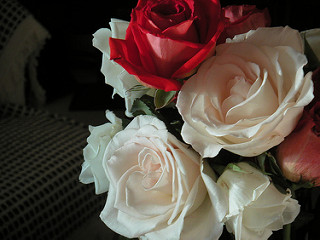

In [9]:

PIL.Image.open(str(roses[1]))

Read flowers images from disk into numpy array using opencv.

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

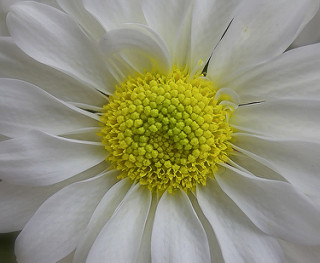

In [ ]:
PIL.Image.open(str(flowers_images_dict['daisy'][0])) # testing

Adding label to types of flowers.

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [30]:

img = cv2.imread(str(flowers_images_dict['roses'][0])) # testing for image shape 
img2 = cv2.imread(str(flowers_images_dict['roses'][1]))

In [ ]:
img.shape , img2.shape

((240, 179, 3), (240, 320, 3))

As image shape is different so we resize image to 180 , 180 for generalization.

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

Making a X and y list of resized image arrays.

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:

X = np.array(X) # converting to numpy array for our ease.
y = np.array(y)


Train test split using sklearn.

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


Preprocessing: scale images.

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


Build unaugmented convolutional neural network and train it.

In [22]:
num_classes = 5

model = Sequential([
  layers.Conv2D(10, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(30, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(50, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 225ms/step - accuracy: 0.4775 - loss: 1.2624
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.5996 - loss: 1.0117
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.6940 - loss: 0.8083
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.7874 - loss: 0.5873
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - accuracy: 0.8761 - loss: 0.3595
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.9368 - loss: 0.2037
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 211ms/step - accuracy: 0.9604 - loss: 0.1359
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.9793 - loss: 0.0799
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 209ms/step - accuracy: 0.9775 - loss: 0.0838
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 211ms/step - accuracy: 0.9895 - loss: 0.0443


In [ ]:
model.save("unAugmented_cnn.keras") # saving model 

Making confusion matrix.

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step


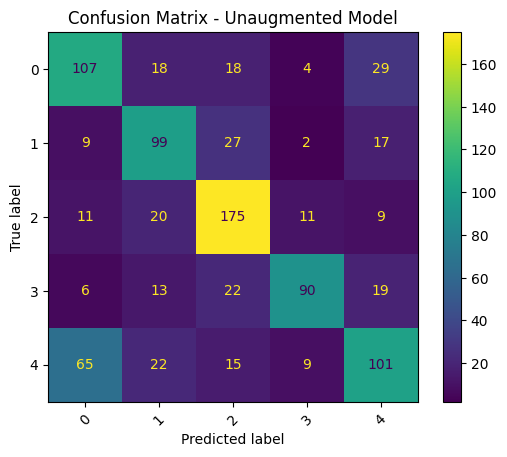

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras

# Load the model
unaug_model = keras.models.load_model("unAugmented_cnn.keras")

# Predict
y_pred = unaug_model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title("Confusion Matrix - Unaugmented Model")
plt.show()


Testing model on first 10 predictions.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


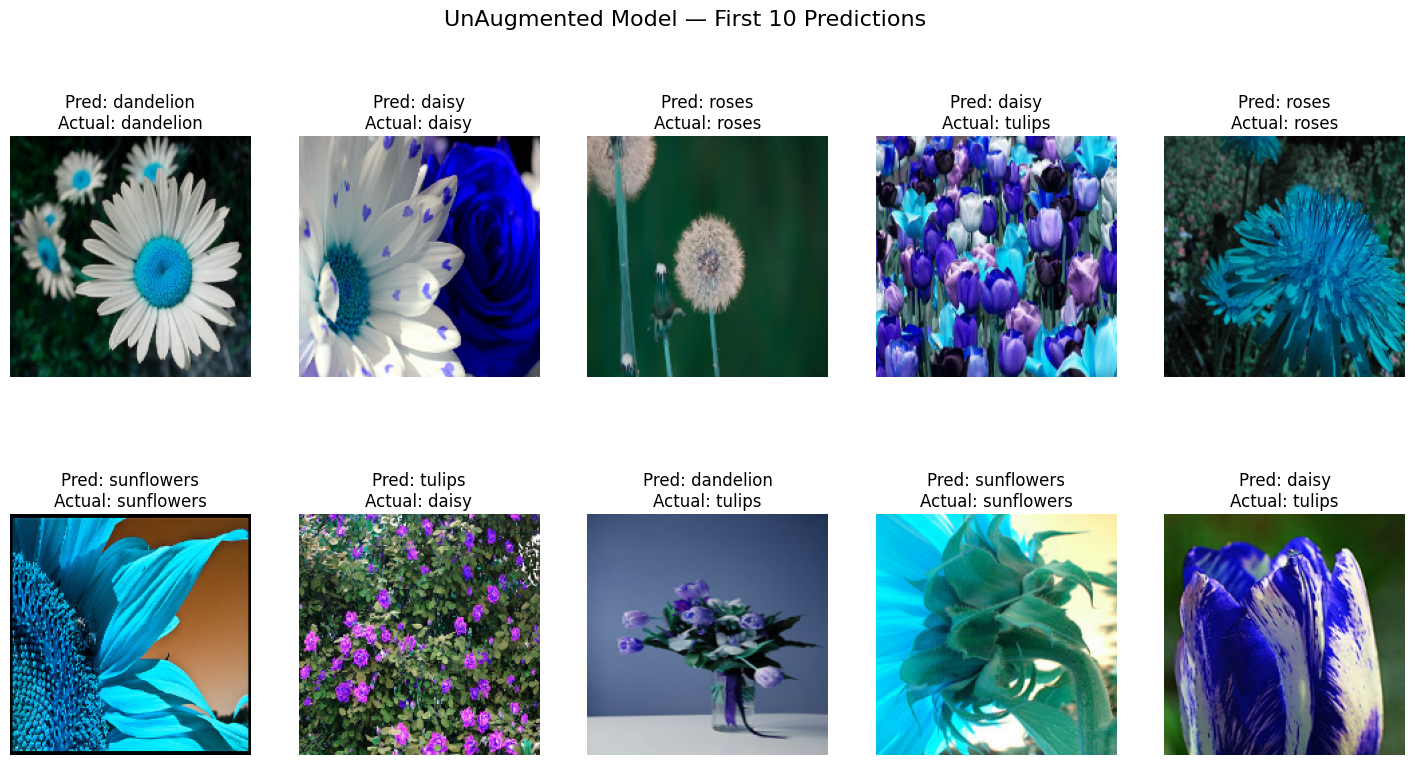

In [21]:
class_names = ['daisy','dandelion','roses','sunflowers','tulips']

plt.figure(figsize=(18, 9))
for i in range(10):
    pred = np.argmax(unaug_model.predict(X_test_scaled[i:i+1]), axis=1)[0]
    actual = y_test[i]

    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].astype("uint8"))
    plt.title(f"Pred: {class_names[pred]}\nActual: {class_names[actual]}")
    plt.axis("off")

plt.suptitle("UnAugmented Model — First 10 Predictions", fontsize=16)
plt.show()


In [ ]:
unaug_model.evaluate(X_test_scaled,y_test) # checking for accuracy

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6231 - loss: 2.0204


[2.020402669906616, 0.6230936646461487]


Here we see that while train accuracy is very high (98%), the test accuracy is significantly low (62.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

Improve Test Accuracy Using Data Augmentation.

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Original image.

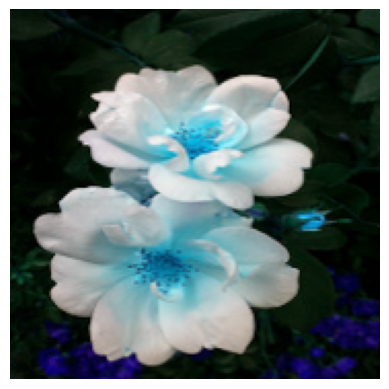

In [ ]:

plt.axis('off') 
plt.imshow(X[0])

Augmented image.

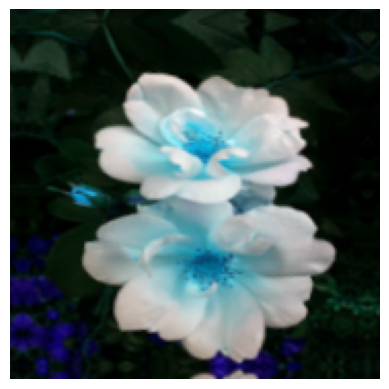

In [26]:

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


Train the model using data augmentation and a drop out layer.

In [26]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=25)  



Epoch 1/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 307ms/step - accuracy: 0.4622 - loss: 1.2958
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - accuracy: 0.5952 - loss: 1.0239
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - accuracy: 0.6395 - loss: 0.9258
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 316ms/step - accuracy: 0.6759 - loss: 0.8325
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 302ms/step - accuracy: 0.6875 - loss: 0.7960
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 298ms/step - accuracy: 0.7133 - loss: 0.7355
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 367ms/step - accuracy: 0.7307 - loss: 0.7104
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 356ms/step - accuracy: 0.7420 - loss: 0.6600
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - accuracy: 0.7573 - loss: 0.6416
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - accuracy: 0.7638 - loss: 0.6230
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 324ms/step - accuracy: 0.7605 - loss: 0.6007
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 28

In [ ]:
model.save("Augmented_cnn.keras") # saving model

Making Confusion Matrix.

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


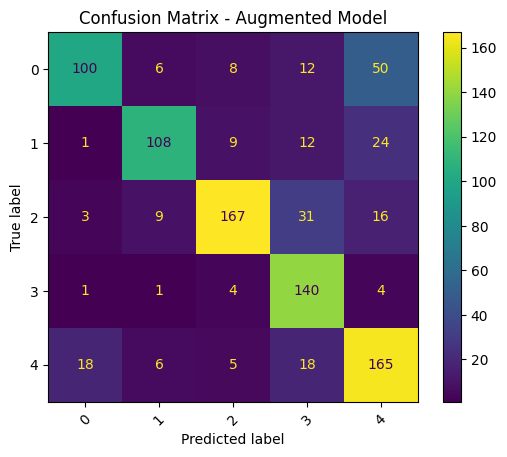

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras

# Load the augmented model
aug_model = keras.models.load_model("Augmented_cnn.keras")

# Predict
y_pred = aug_model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title("Confusion Matrix - Augmented Model")
plt.show()

In [32]:
aug_model.evaluate(X_test_scaled,y_test) # evaluating model

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.7407 - loss: 0.9236


[0.9235676527023315, 0.7407407164573669]


You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 74.07%

Testing first 10 predictions.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


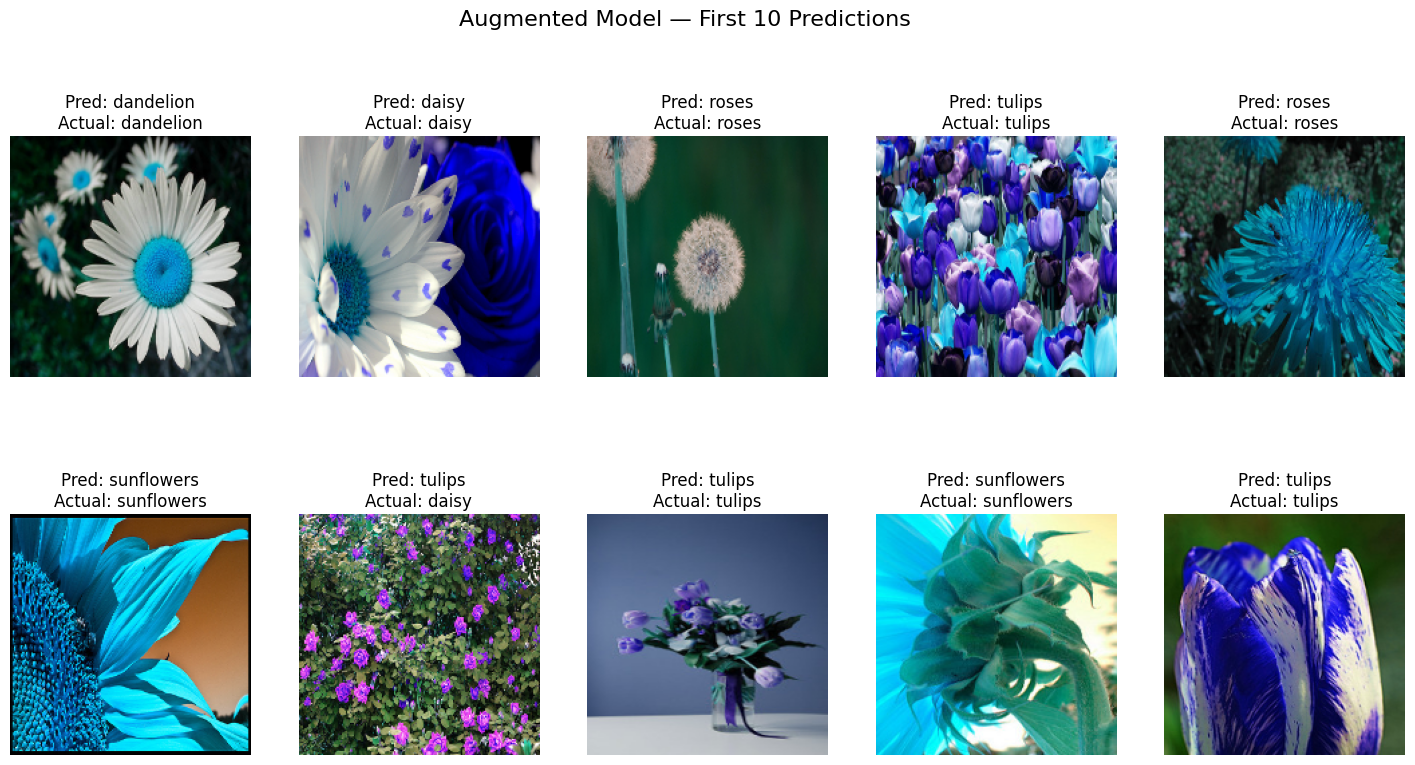

In [29]:
plt.figure(figsize=(18, 9))
for i in range(10):
    pred = np.argmax(aug_model.predict(X_test_scaled[i:i+1]), axis=1)[0]
    actual = y_test[i]

    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].astype("uint8"))
    plt.title(f"Pred: {class_names[pred]}\nActual: {class_names[actual]}")
    plt.axis("off")

plt.suptitle("Augmented Model — First 10 Predictions", fontsize=16)
plt.show()
